BIKE

https://www.kaggle.com/competitions/bike-sharing-demand/
```
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals
```

In [1]:
import numpy as np
import pandas as pd

from datetime import date, datetime, time, timedelta
from dateutil.relativedelta import relativedelta

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
# plt.rcParams['figure.figsize'] = [6.4, 4.8]

import warnings
warnings.filterwarnings(action='ignore')

# 구조 확인
```
df.head()
df.info()
df.shape
```

In [2]:
# train = pd.read_csv('./train.csv', parse_dates=['datetime']) # 날짜연습을 하기위해 오브젝으로 놔두져
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv', parse_dates=['datetime'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


# 컬럼명 확인
```
train.columns
```

In [3]:
# 컬럼명 변경
train = train.rename(columns={'datetime':'regdate', 'count':'regcount'})
test = test.rename(columns={'datetime':'regdate'})
train.columns

Index(['regdate', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'regcount'],
      dtype='object')

In [4]:
# 컬럼명 소문자로 변경
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()
test.columns

Index(['regdate', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

# 결측치 확인

In [5]:
# 결측치가 0보다 큰거만
train.isna().sum()[train.isna().sum()>0]

Series([], dtype: int64)

# 오브젝트 확인

In [6]:
# 오브젝트만
train.select_dtypes('object').columns

Index(['regdate'], dtype='object')

In [7]:
test_time_str = train['regdate'][0]
type(test_time_str)

str

In [8]:
datetime.strptime(test_time_str, '%Y-%m-%d %H:%M:%S')

datetime.datetime(2011, 1, 1, 0, 0)

In [9]:
datetime.fromisoformat(test_time_str)

datetime.datetime(2011, 1, 1, 0, 0)

In [10]:
traincp = train.copy()
traincp['regdate_1'] = traincp['regdate'].apply(lambda x:datetime.fromisoformat(x) if type(x) is str else x)
traincp['regdate_1']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: regdate_1, Length: 10886, dtype: datetime64[ns]

In [11]:
traincp['regdate_2'] = pd.to_datetime(traincp['regdate'])
traincp['regdate_2']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: regdate_2, Length: 10886, dtype: datetime64[ns]

In [12]:
traincp['regdate_3'] = traincp['regdate'].astype('datetime64')
traincp['regdate_3']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: regdate_3, Length: 10886, dtype: datetime64[ns]

In [13]:
train['regdate'] = traincp['regdate_3']
del traincp
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   regdate     10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  regcount    10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


## regdate

In [14]:
train['y'] = train['regdate'].dt.year
train['m'] = train['regdate'].dt.month
train['d'] = train['regdate'].dt.day
train['h'] = train['regdate'].dt.hour
train.head()

,regdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,regcount,y,m,d,h
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [15]:
test['y'] = test['regdate'].dt.year
test['m'] = test['regdate'].dt.month
test['d'] = test['regdate'].dt.day
test['h'] = test['regdate'].dt.hour
test.head()

,regdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,y,m,d,h
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


### index화, 해제
```
df.set_index(컬럼명)
df.reset_index()
```

In [16]:
train.shape

(10886, 16)

In [17]:
train['regdate'].nunique()

10886

In [18]:
train = train.set_index('regdate')
train.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-19 14:00:00', '2012-12-19 15:00:00',
               '2012-12-19 16:00:00', '2012-12-19 17:00:00',
               '2012-12-19 18:00:00', '2012-12-19 19:00:00',
               '2012-12-19 20:00:00', '2012-12-19 21:00:00',
               '2012-12-19 22:00:00', '2012-12-19 23:00:00'],
              dtype='datetime64[ns]', name='regdate', length=10886, freq=None)

In [19]:
test = test.set_index('regdate')
test.index

DatetimeIndex(['2011-01-20 00:00:00', '2011-01-20 01:00:00',
               '2011-01-20 02:00:00', '2011-01-20 03:00:00',
               '2011-01-20 04:00:00', '2011-01-20 05:00:00',
               '2011-01-20 06:00:00', '2011-01-20 07:00:00',
               '2011-01-20 08:00:00', '2011-01-20 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='regdate', length=6493, freq=None)

## casual, registered, regcount

In [20]:
train[train['casual']+train['registered']!=train['regcount']].shape[0]

0

# EDA

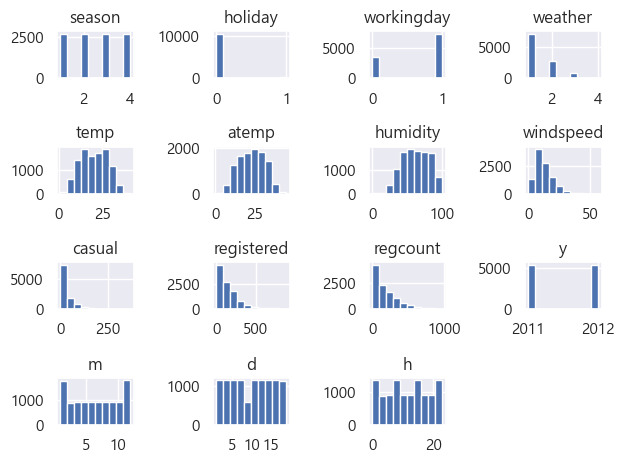

In [21]:
train.hist()
plt.tight_layout()
plt.show()

In [22]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'regcount', 'y', 'm',
       'd', 'h'],
      dtype='object')

In [23]:
test.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'y', 'm', 'd', 'h'],
      dtype='object')

In [24]:
col_list = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed','y', 'm', 'd','h']
len(col_list)

12

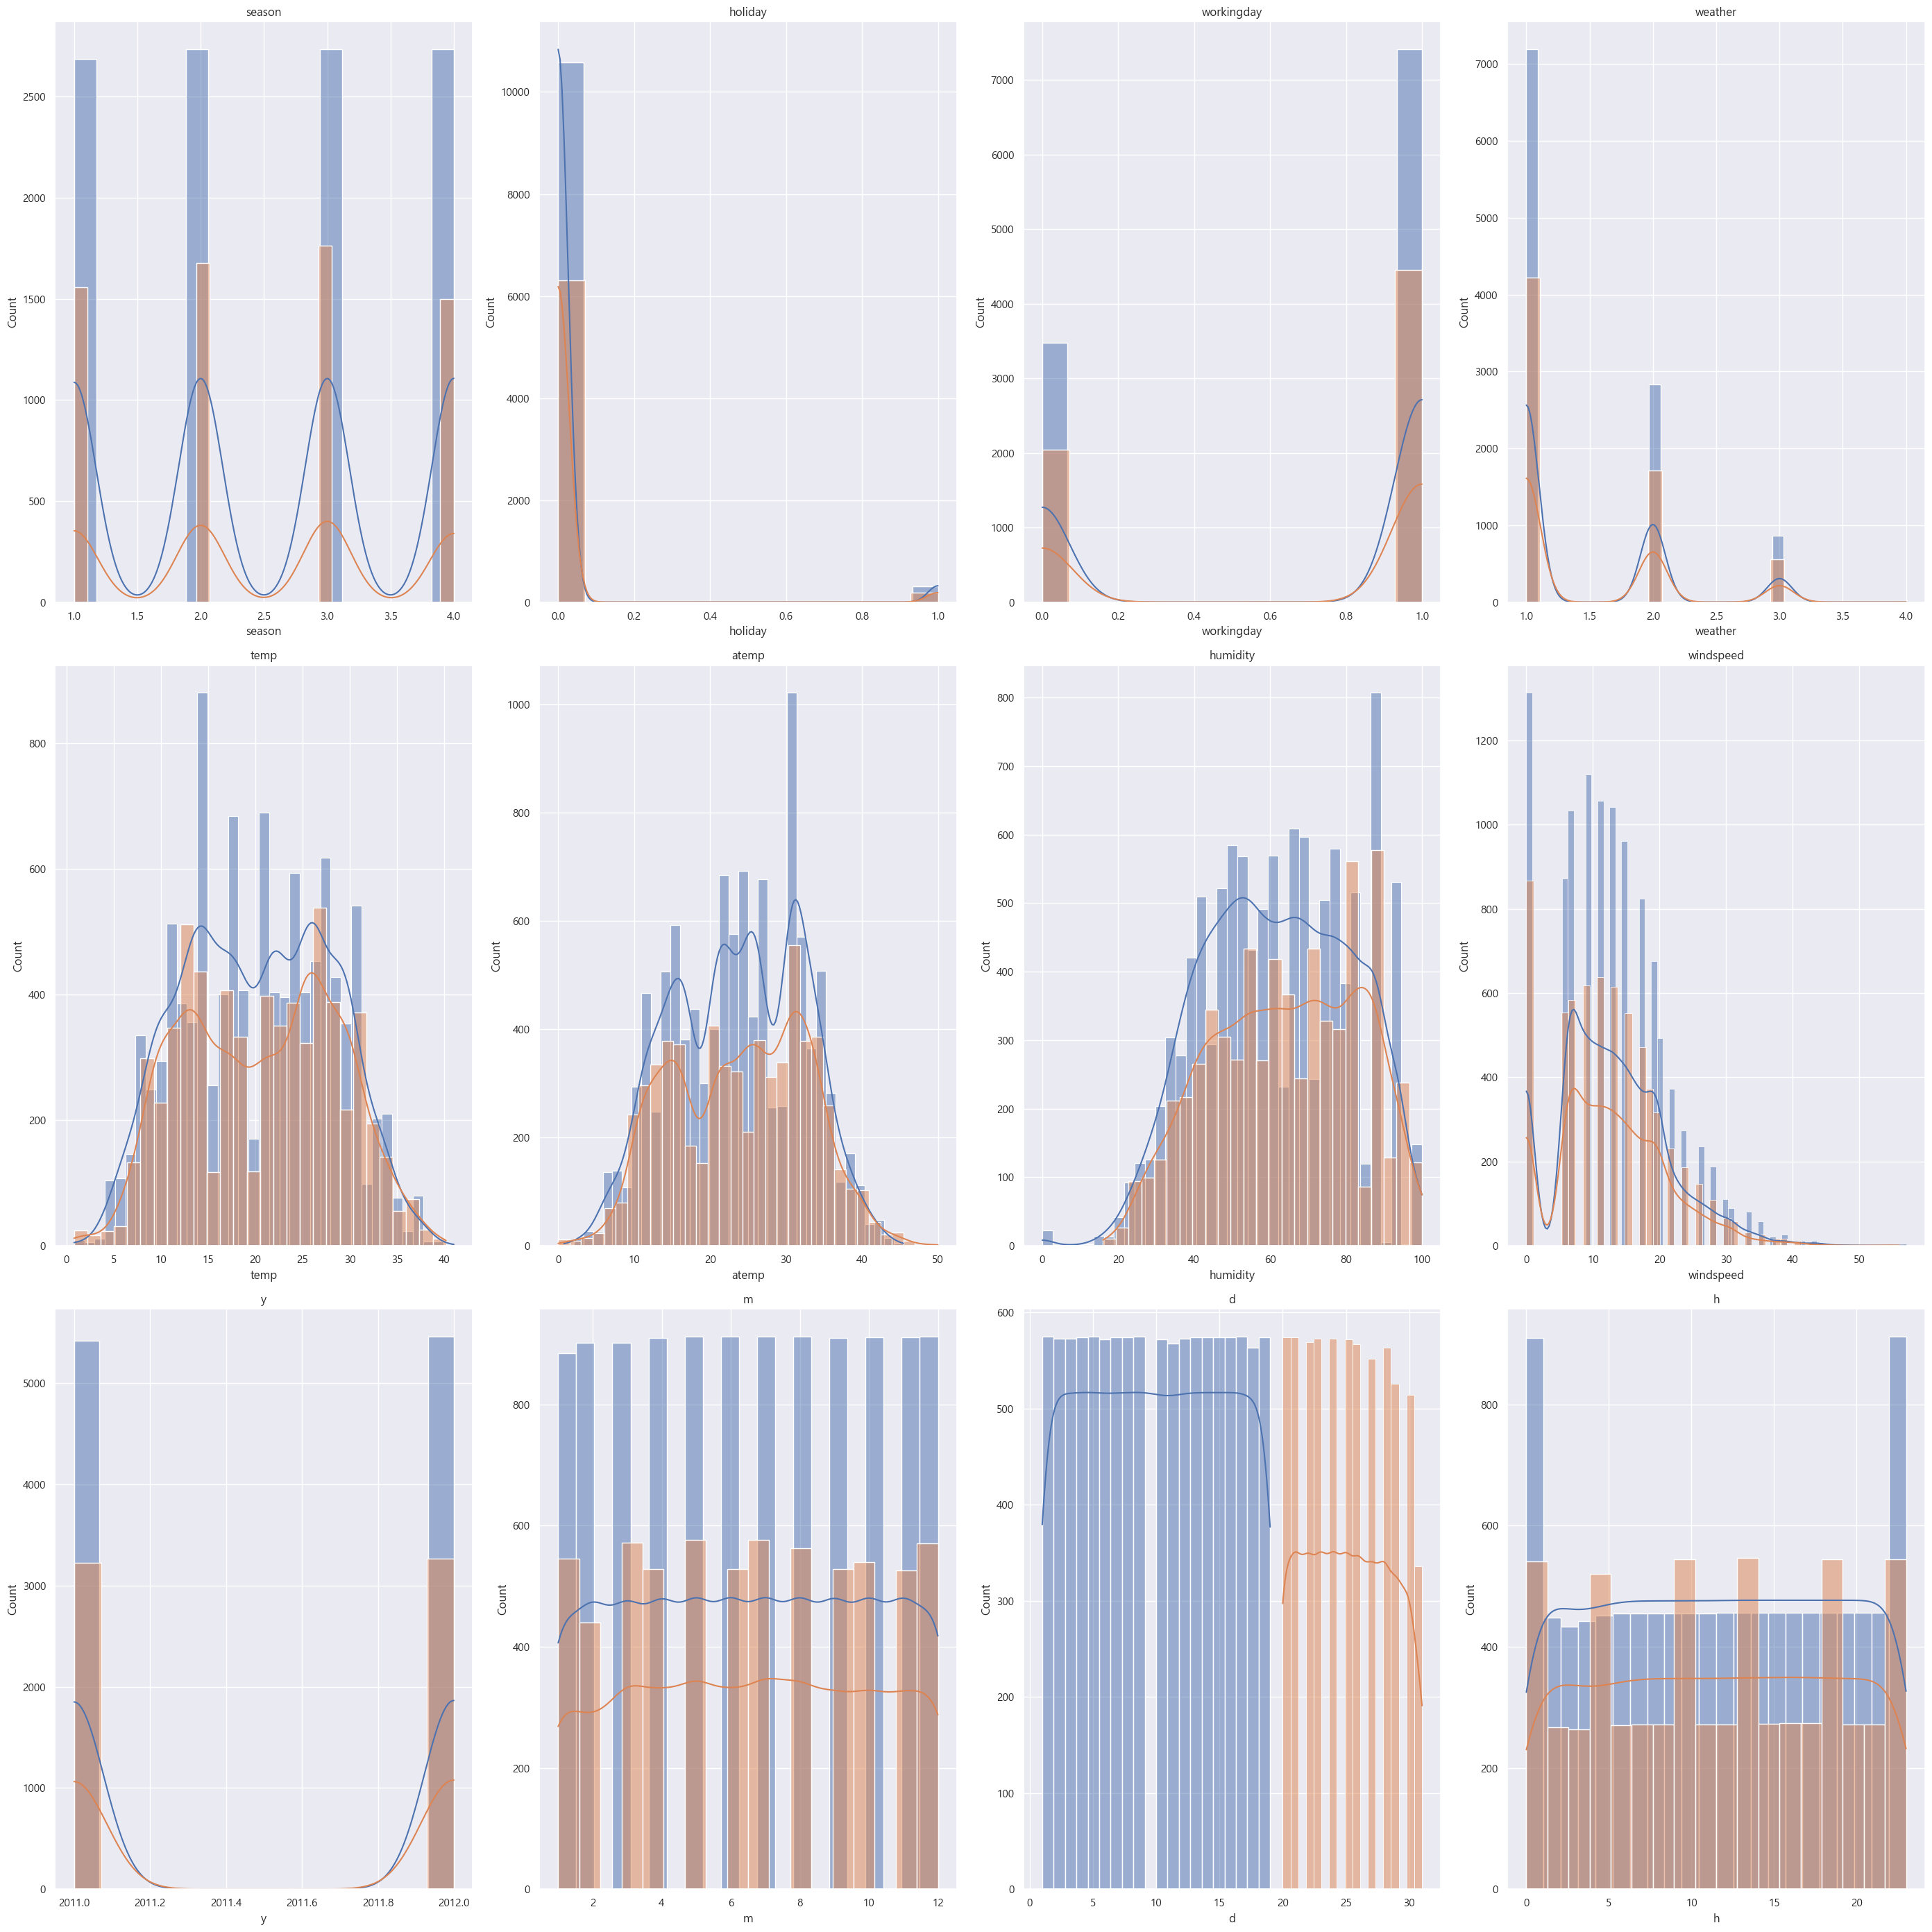

In [25]:
fig, axes = plt.subplots(3, 4, figsize=(28,28))

for i, col in  enumerate(col_list):
    r = i//4
    c = i%4
    # print(r,c)
    axes[r][c].set_title(col)
    sns.histplot(data=train, x=col, ax=axes[r][c], kde=True)
    sns.histplot(data=test, x=col, ax=axes[r][c], kde=True)
    
plt.tight_layout()
plt.show()

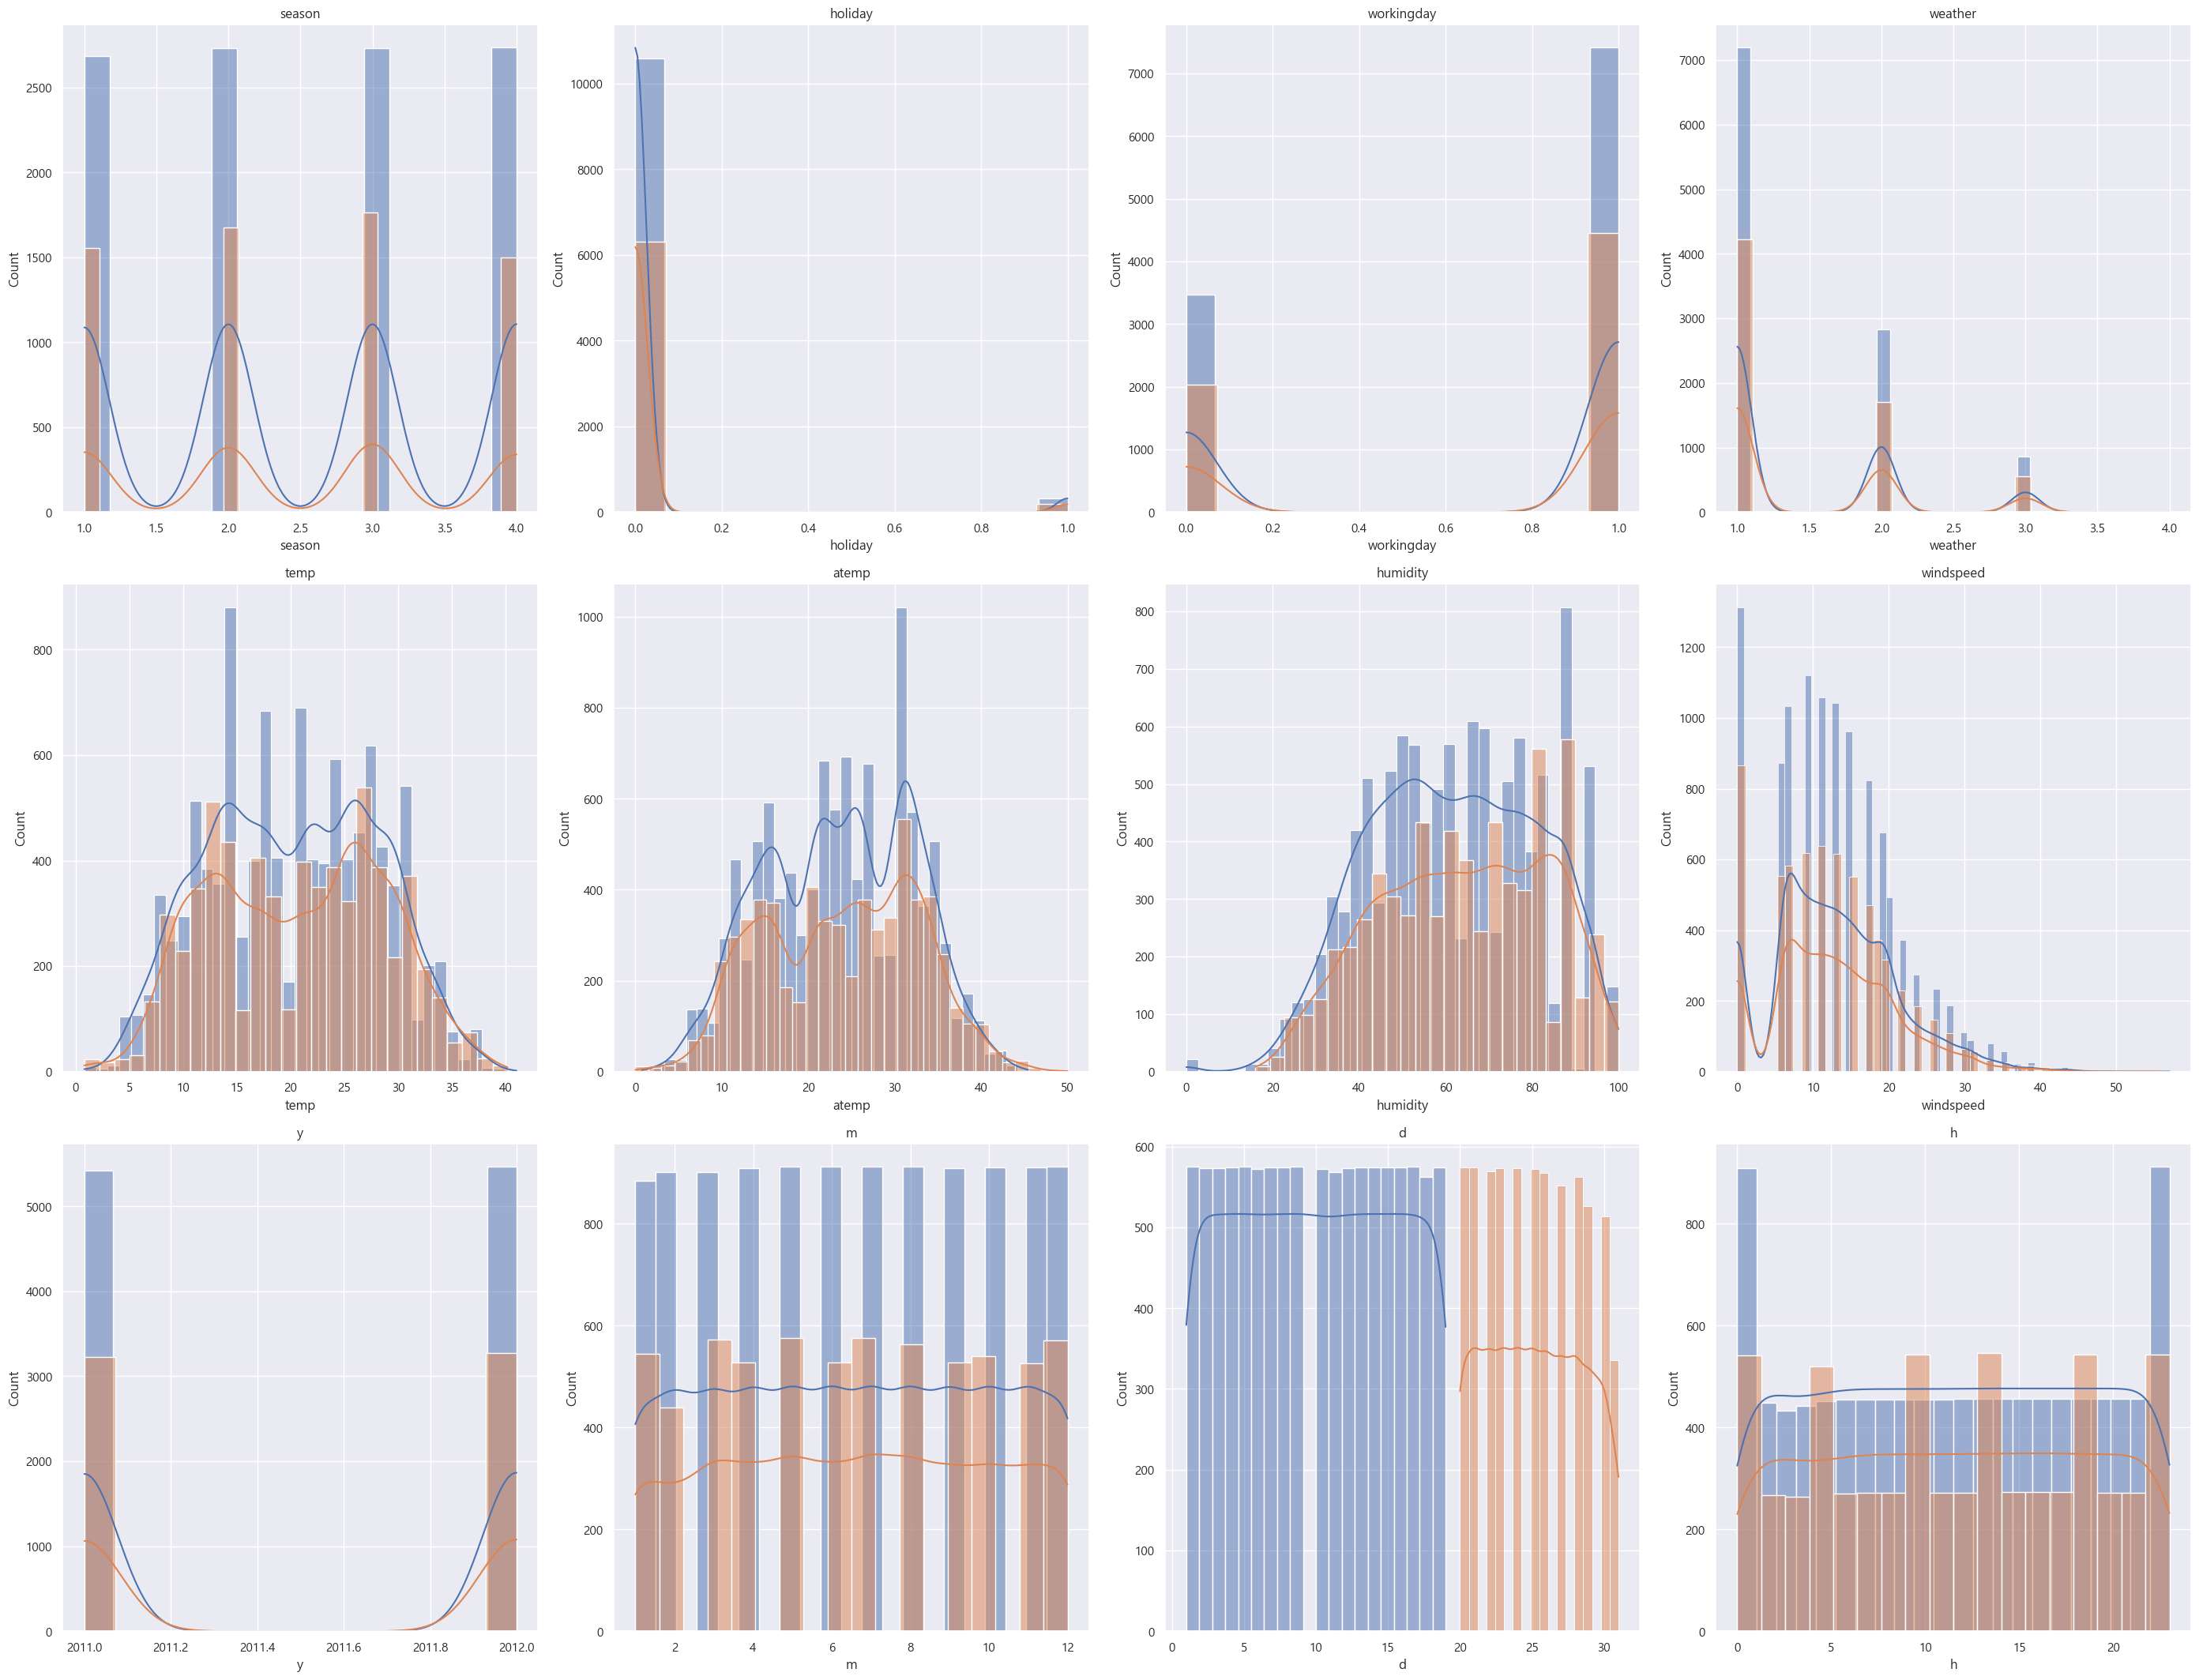

In [26]:
plt.figure(figsize=(28,28))

for i, col in  enumerate(test.columns):
    plt.subplot(4,4,i+1)
    plt.title(col)
    sns.histplot(data=train, x=col, kde=True)
    sns.histplot(data=test, x=col, kde=True)
    
plt.tight_layout()
plt.show()

In [27]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'regcount', 'y', 'm',
       'd', 'h'],
      dtype='object')

In [28]:
test.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'y', 'm', 'd', 'h'],
      dtype='object')

In [29]:
taget_col_list = []
for col in train.columns:
    if col not in test.columns:
        taget_col_list.append(col)
taget_col_list

['casual', 'registered', 'regcount']

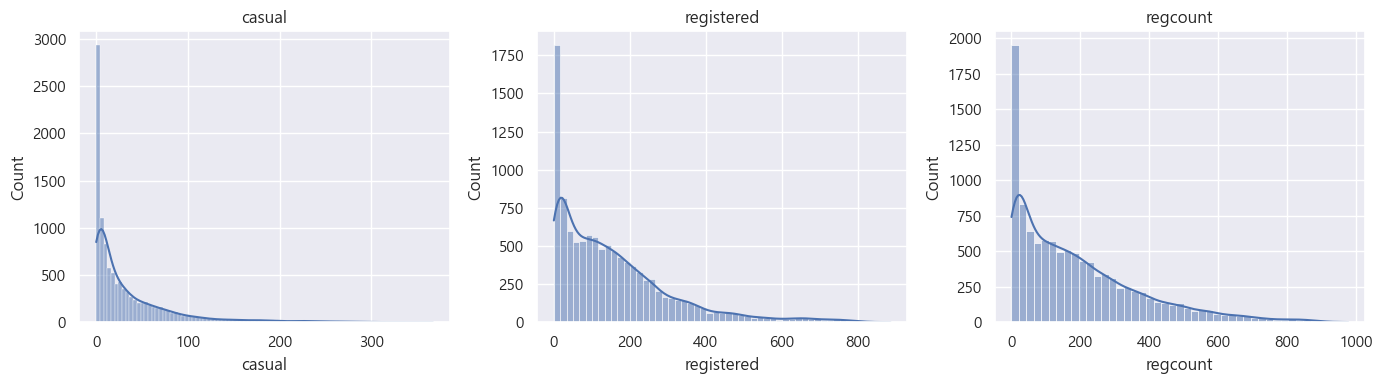

In [30]:
plt.figure(figsize=(14,4))

for i, col in  enumerate(taget_col_list):
    plt.subplot(1,3,i+1)
    plt.title(col)
    sns.histplot(data=train, x=col, kde=True)
    
plt.tight_layout()
plt.show()

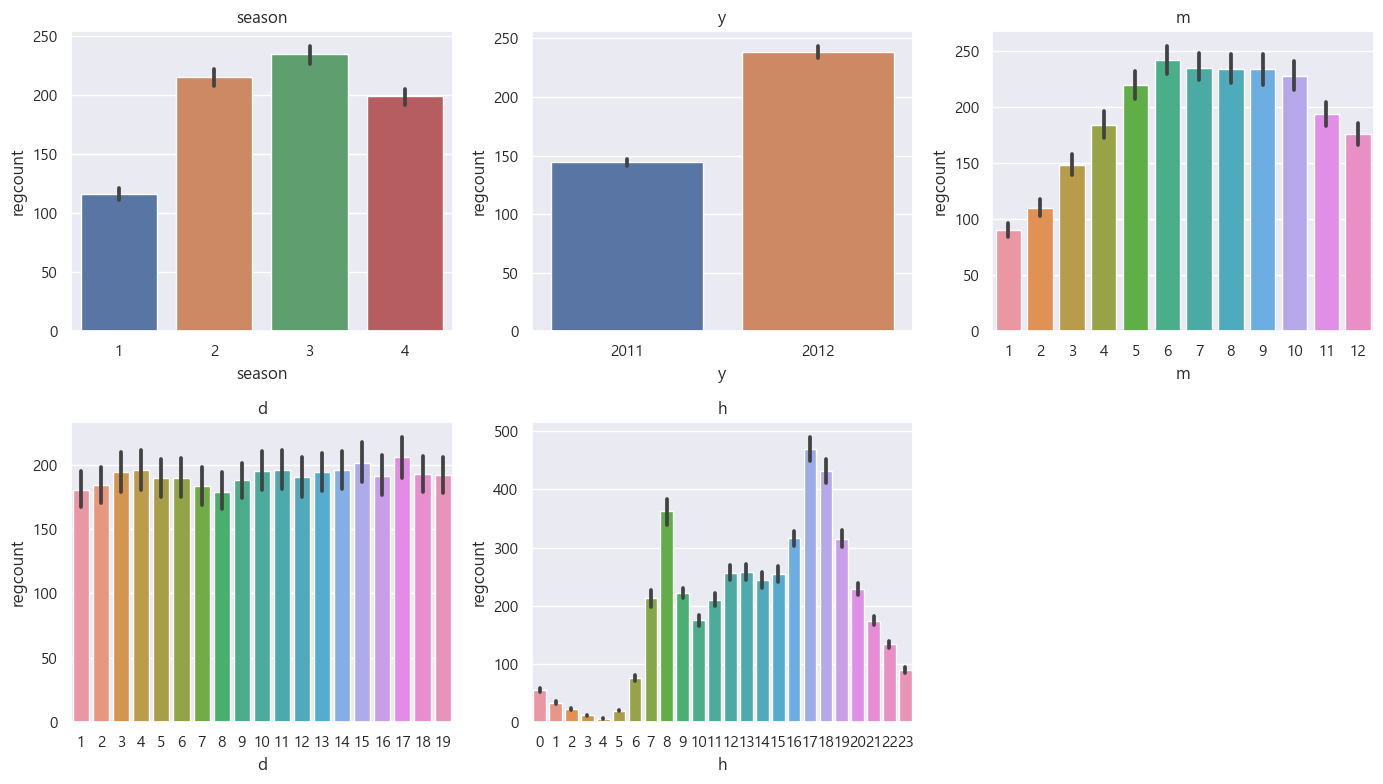

In [31]:
plt.figure(figsize=(14,8))

for i, col in  enumerate(['season', 'y', 'm', 'd', 'h']):
    plt.subplot(2,3,i+1)
    plt.title(col)
    sns.barplot(data=train, x=col, y='regcount')
    
plt.tight_layout()
plt.show()

## d를 대신하기 위한 요일 추가

In [32]:
train['w'] = train.index.dayofweek

In [33]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,regcount,y,m,d,h,w
regdate,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


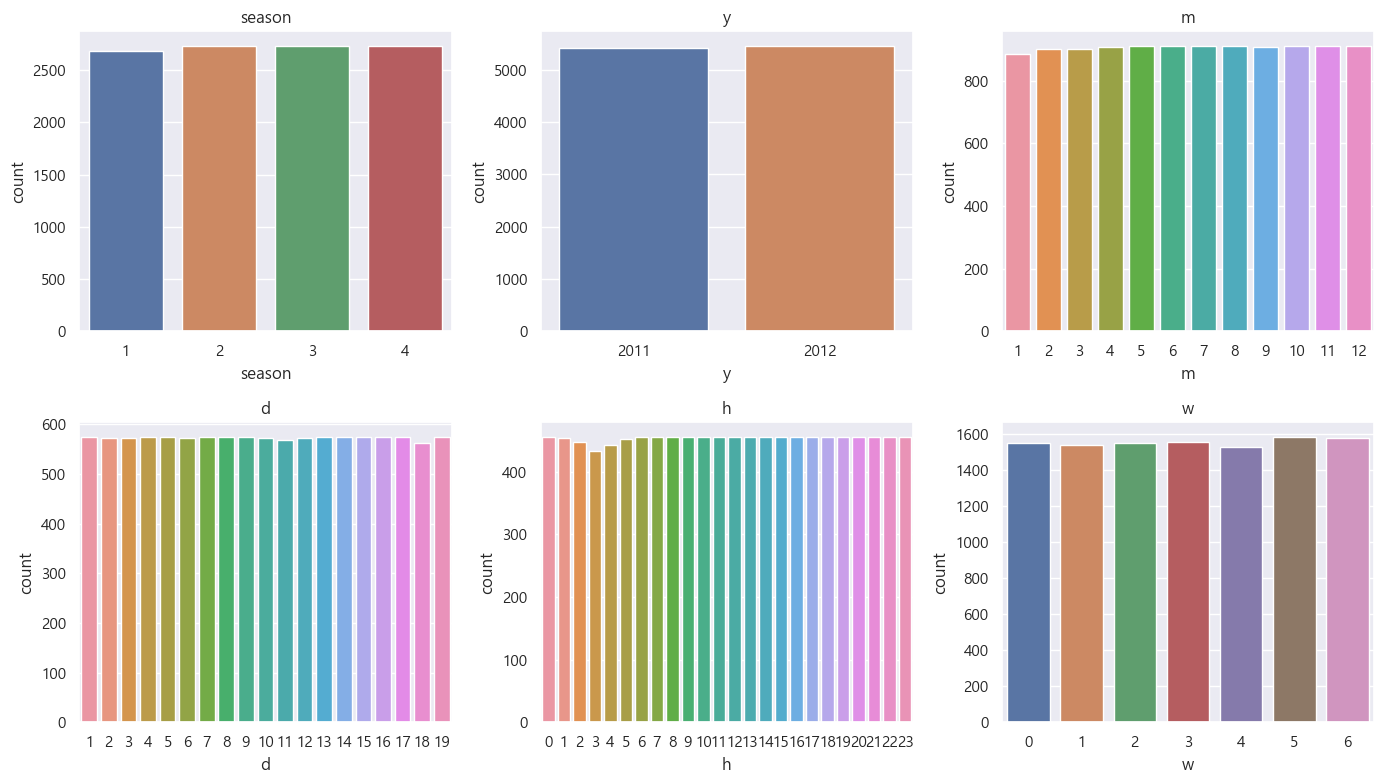

In [34]:
plt.figure(figsize=(14,8))

for i, col in  enumerate(['season', 'y', 'm', 'd', 'h', 'w']):
    plt.subplot(2,3,i+1)
    plt.title(col)
    sns.countplot(data=train, x=col)
    
plt.tight_layout()
plt.show()

<AxesSubplot: >

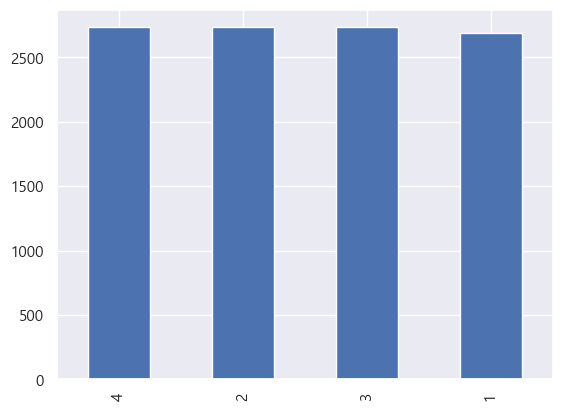

In [35]:
train['season'].value_counts().plot(kind='bar')

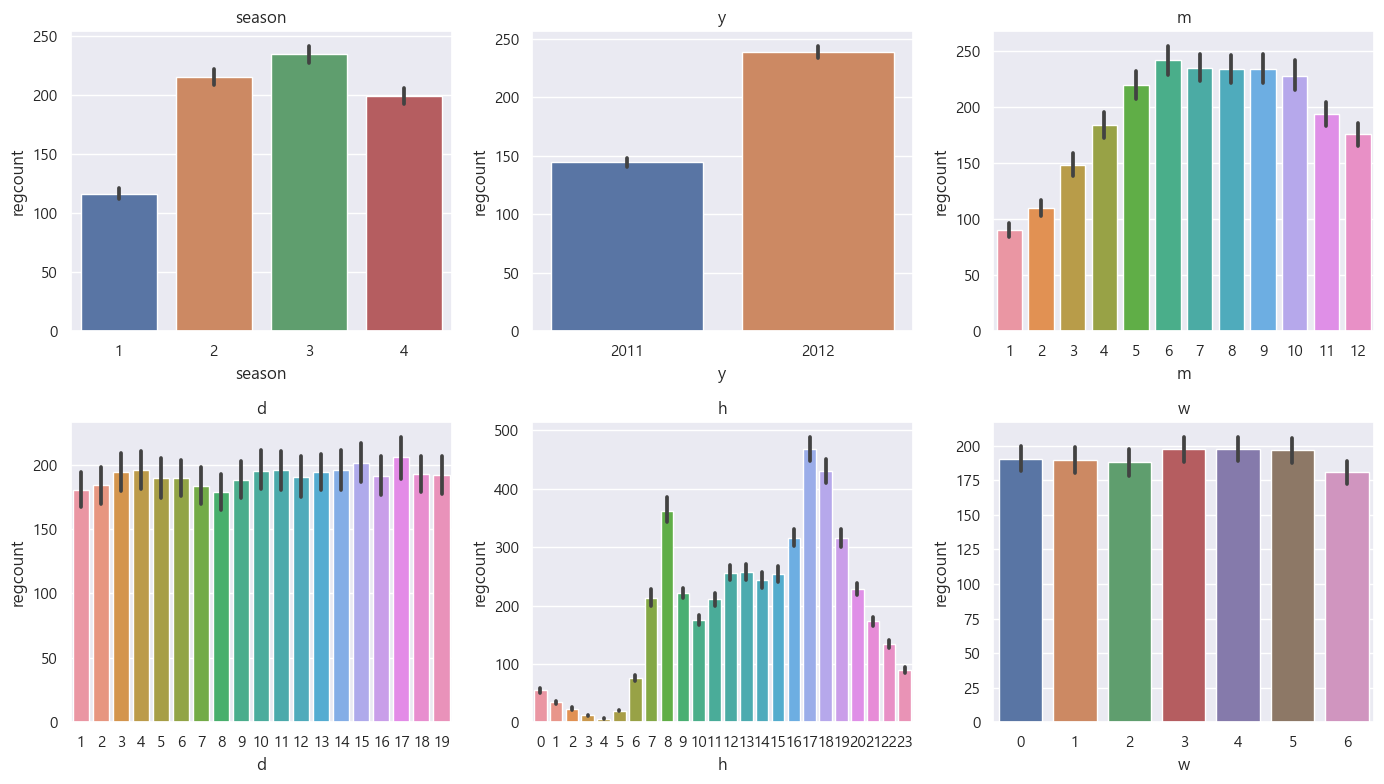

In [36]:
plt.figure(figsize=(14,8))

for i, col in  enumerate(['season', 'y', 'm', 'd', 'h', 'w']):
    plt.subplot(2,3,i+1)
    plt.title(col)
    sns.barplot(data=train, x=col, y='regcount')
    
plt.tight_layout()
plt.show()

<AxesSubplot: xlabel='season'>

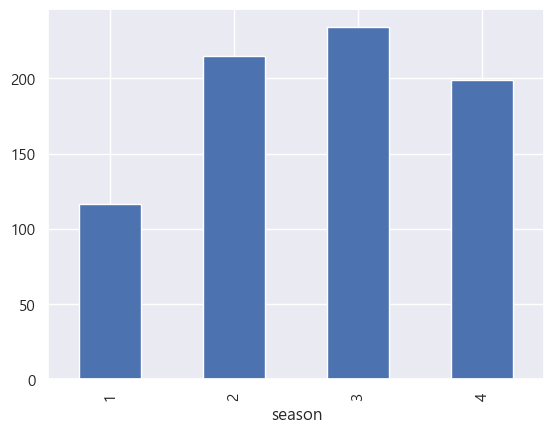

In [37]:
train.groupby('season')['regcount'].mean().plot(kind='bar')

# 다시 오브젝트 확인

## holiday, workingday

holiday - whether the day is considered a holiday
0 공휴일아님
1 공휴일

workingday - whether the day is neither a weekend nor holiday
0 주말 or 쉬는날
1 주중

<pre>
workingday  holiday
1           0          7412  [1]일하는날
0           0          3163  [0]주말
            1           311  [2]공휴일

In [38]:
train[['workingday', 'holiday']].value_counts()

workingday  holiday
1           0          7412
0           0          3163
            1           311
dtype: int64

In [39]:
train['day_type'] = (train['workingday']==0)&(train['holiday']==1)

### 파생변수 day_type
1. np.where
2. loc
3. lambda

In [40]:
train['date_type'] = 0
train['date_type'] = np.where( (train['holiday']==0) & (train['workingday'] == 1),   1,  train['date_type'])
train['date_type'] = np.where( (train['holiday']==1) & (train['workingday'] == 0),   2,  train['date_type'])
train['date_type'].unique()

array([0, 1, 2], dtype=int64)

In [41]:

train['day_type1'] = np.where( (train['workingday']==0)&(train['holiday']==0) , 0, np.where( (train['workingday']==1)&(train['holiday']==0) , 1, np.where( (train['workingday']==0)&(train['holiday']==1) , 2, 3)))
train['day_type1'].unique()

array([0, 1, 2])

In [42]:
# train[(train['workingday']==0)&(train['holiday']==0)]['day_type2'] = 0
# train[(train['workingday']==1)&(train['holiday']==1)]['day_type2'] = 1
# train[(train['workingday']==0)&(train['holiday']==1)]['day_type2'] = 2
# train['day_type2'].unique()

In [43]:
def day_type(x, y):
    # print(x,y)
    day_type = 3
    if (x==0) & (y==0):
        day_type = 0
    elif (x==1) & (y==0):
        day_type = 1
    elif (x==0) & (y==1):
        day_type = 2
    return day_type

day_type(0,1)

2

In [44]:
train['day_type2'] = train[['workingday','holiday']].apply(lambda df: day_type(df['workingday'], df['holiday']), axis=1)
train['day_type2'].unique()

array([0, 1, 2], dtype=int64)

In [45]:
idx0 = train[(train['workingday']==0)&(train['holiday']==0)].index
idx1 = train[(train['workingday']==1)&(train['holiday']==0)].index
idx2 = train[(train['workingday']==0)&(train['holiday']==1)].index

train.loc[idx0, 'day_type3'] = 0
train.loc[idx1, 'day_type3'] = 1
train.loc[idx2, 'day_type3'] = 2
train['day_type3'] = train['day_type3'].astype('int')
train['day_type3'].unique()

array([0, 1, 2])

In [46]:
train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,y,m,d,h,w,day_type,date_type,day_type1,day_type2,day_type3
regdate,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,...,2011,1,1,0,5,False,0,0,0,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,...,2011,1,1,1,5,False,0,0,0,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,...,2011,1,1,2,5,False,0,0,0,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,...,2011,1,1,3,5,False,0,0,0,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,...,2011,1,1,4,5,False,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,...,2012,12,19,19,2,False,1,1,1,1
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,...,2012,12,19,20,2,False,1,1,1,1
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,...,2012,12,19,21,2,False,1,1,1,1


In [47]:
train['day_type'] = train['day_type3']
train = train.drop(['date_type', 'day_type1', 'day_type2', 'day_type3'], axis=1)
train['day_type'].value_counts()

1    7412
0    3163
2     311
Name: day_type, dtype: int64

In [48]:
train.groupby('day_type')[['casual', 'registered', 'regcount']].count()

,casual,registered,regcount
day_type,,,
0,3163,3163,3163
1,7412,7412,7412
2,311,311,311


In [49]:
train.groupby('day_type')[['casual', 'registered', 'regcount']].sum()

,casual,registered,regcount
day_type,,,
0,190866,406198,597064
1,186098,1244506,1430604
2,15171,42637,57808


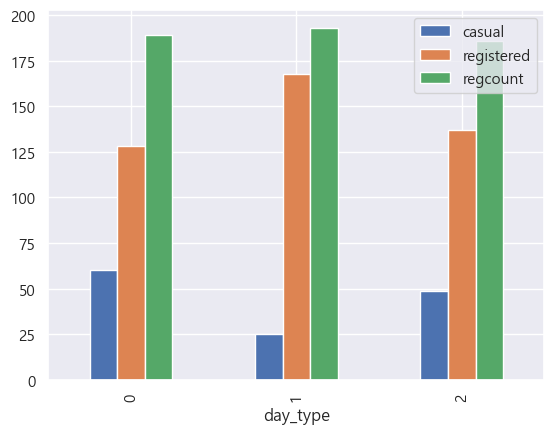

In [50]:
g = train.groupby('day_type')[['casual', 'registered', 'regcount']]
(g.sum() / g.count()).plot(kind='bar')
plt.show()

<pre>
workingday  holiday
1           0          7412  [1]일하는날
0           0          3163  [0]주말
            1           311  [2]공휴일

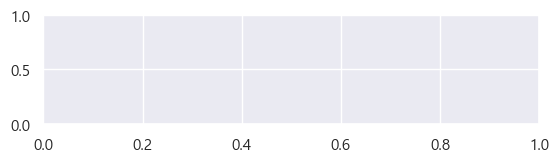

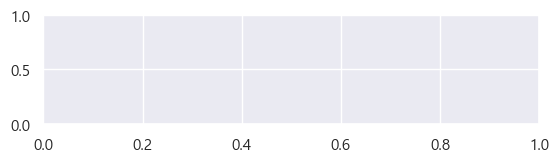

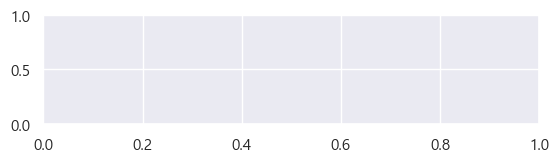

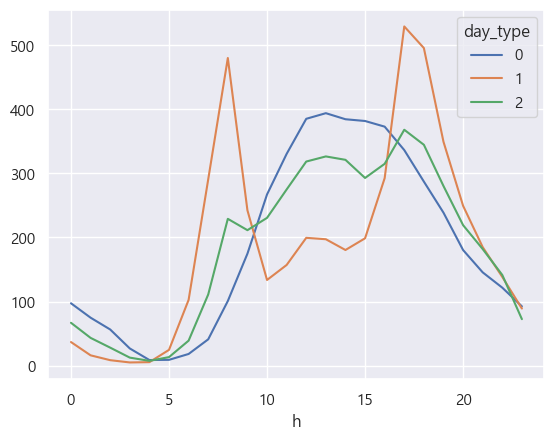

In [51]:
#평일 일때 시간때별
#주말 일때 시간때별
#공휴일일때 시간때별
plt.subplot(3,1,1)
train.pivot_table(index='h', columns='day_type', values='casual').plot()
plt.subplot(3,1,2)
train.pivot_table(index='h', columns='day_type', values='registered').plot()
plt.subplot(3,1,3)
train.pivot_table(index='h', columns='day_type', values='regcount').plot()
plt.show()

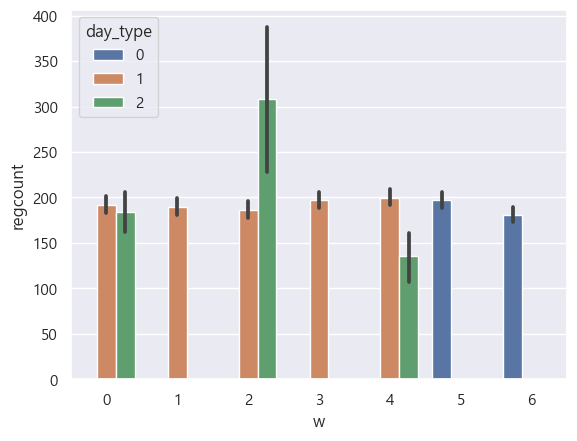

In [52]:
sns.barplot(data=train, x="w", y="regcount", hue='day_type')
plt.show()

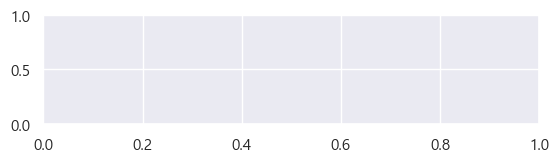

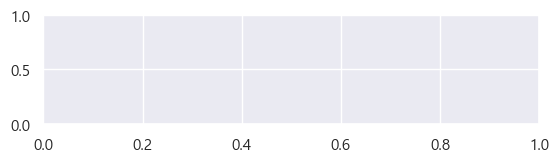

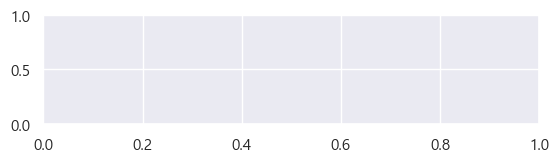

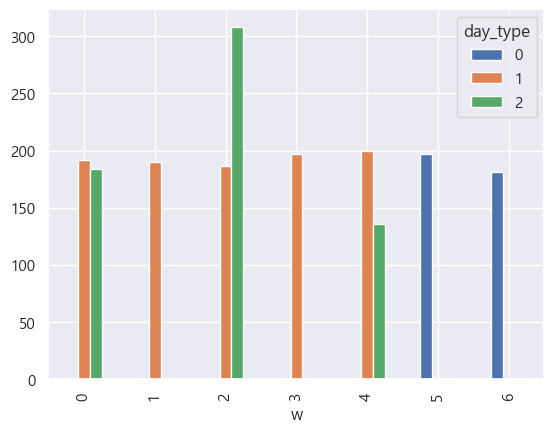

In [53]:
#평일 일때 공휴일일때 요일별
plt.subplot(3,1,1)
train.pivot_table(index='w', columns='day_type', values='casual').plot(kind='bar')
plt.subplot(3,1,2)
train.pivot_table(index='w', columns='day_type', values='registered').plot(kind='bar')
plt.subplot(3,1,3)
train.pivot_table(index='w', columns='day_type', values='regcount').plot(kind='bar')
plt.show()

평일 중 공휴일은 월 수 금 이 있는데 유독 수요일만 많이 타네요

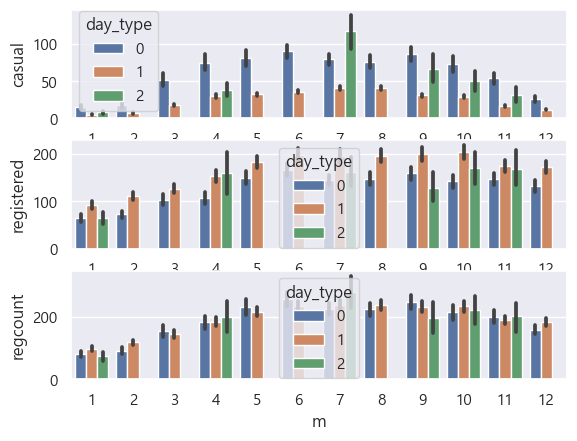

In [54]:
#평일 일때 공휴일일때 월별
plt.subplot(3,1,1)
sns.barplot(data=train, x='m', y="casual", hue='day_type')
plt.subplot(3,1,2)
sns.barplot(data=train, x='m', y="registered", hue='day_type')
plt.subplot(3,1,3)
sns.barplot(data=train, x='m', y="regcount", hue='day_type')
plt.show()

# 계절 컬럼 'weather', 'temp', 'atemp', 'humidity', 'windspeed'

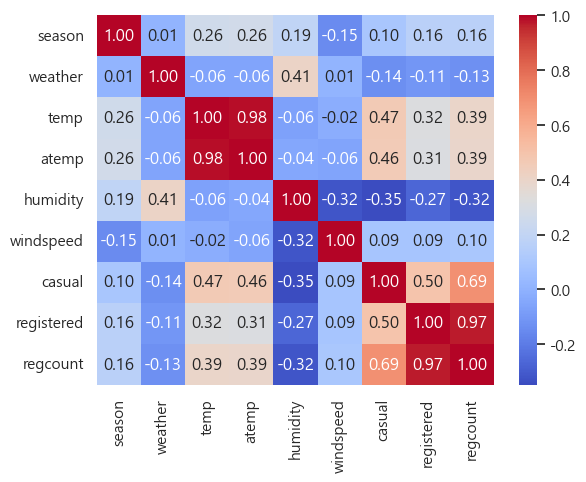

In [55]:
sns.heatmap(train[['season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'regcount']].corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

In [56]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'regcount', 'y', 'm',
       'd', 'h', 'w', 'day_type'],
      dtype='object')

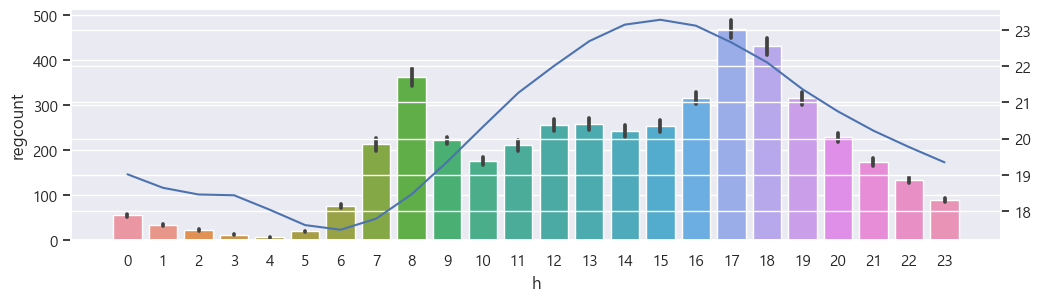

In [64]:
fig, axes = plt.subplots(figsize=(12,3))
sns.barplot(data=train, x="h", y="regcount", ax=axes)

axes2 = axes.twinx()
axes2.plot(train.groupby("h")[['temp']].mean() )

plt.show()

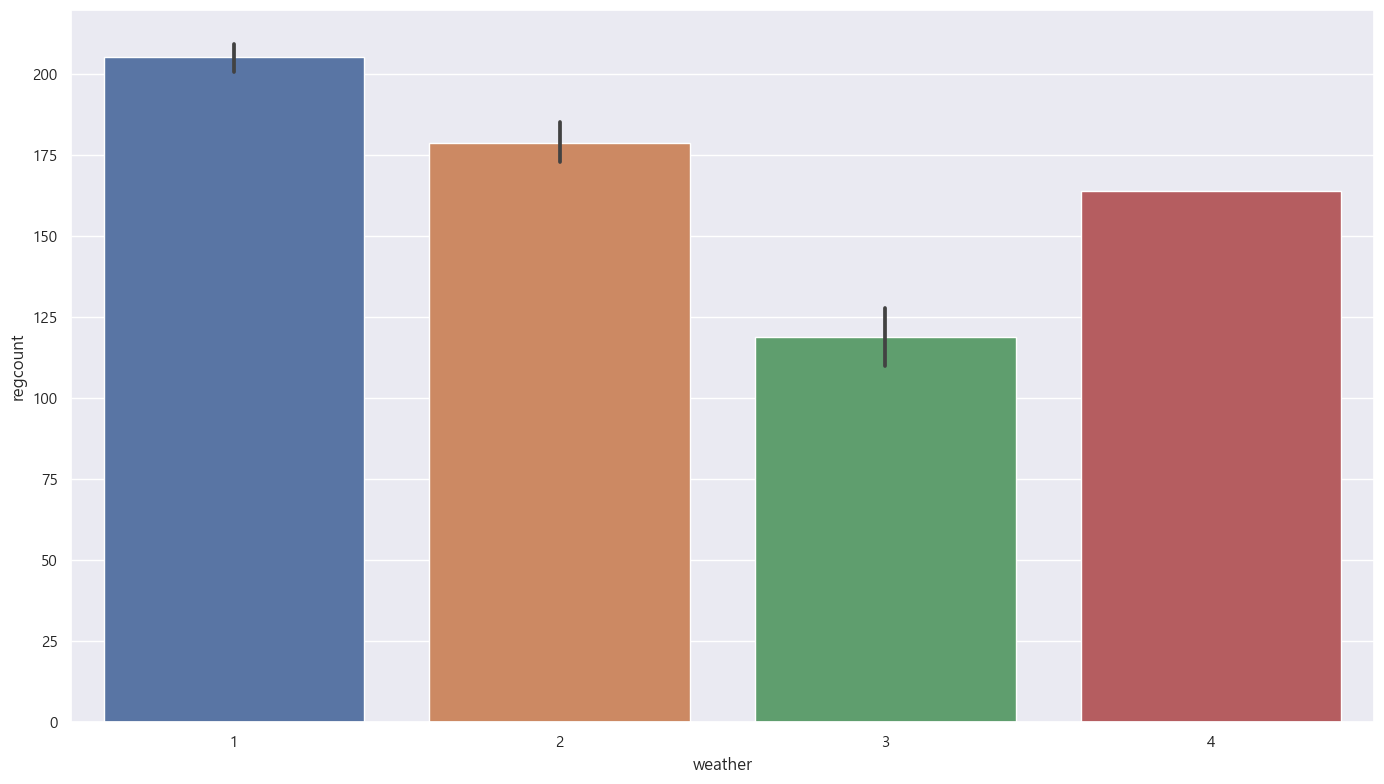

In [63]:
plt.figure(figsize=(14,8))


sns.barplot(data=train, x='weather', y='regcount')
# sns.(data=train, x='h', y='temp', hue='day_type')
    
plt.tight_layout()
plt.show()

# 히트맵

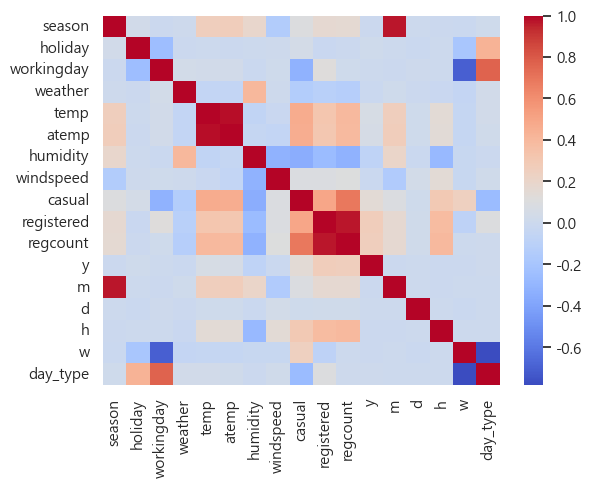

In [59]:
sns.heatmap(train.corr(), cmap='coolwarm')
plt.show()

<AxesSubplot: xlabel='season'>

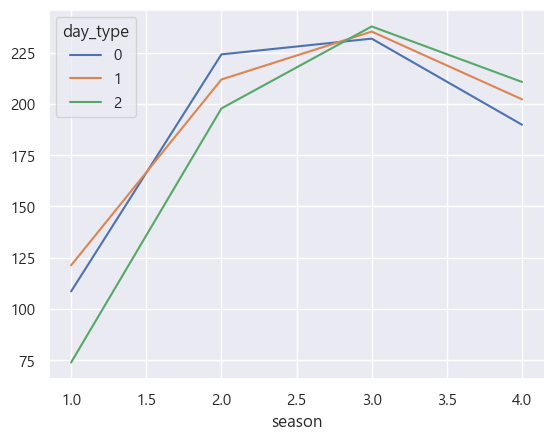

In [60]:
# 계절별
train.pivot_table(index='season', columns='day_type', values='regcount').plot()